In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
from adjustText import adjust_text

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')



6

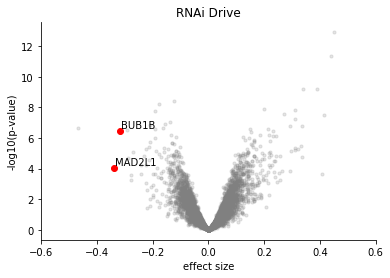

In [4]:
##########################################################################################
######################################### figex 1b #######################################
##########################################################################################



drive = pd.read_csv('Limma/lim_res_rnai_drive_NEW.csv',index_col=0)
#rnai = pd.read_csv('Limma/lim_res_rnai_achilles_NEW.csv',index_col=0)

fix,ax = plt.subplots()
plt.scatter(drive.loc[:,'EffectSize'],-np.log10(drive.loc[:,'p.value']),alpha=.2,color='gray',s=10)
plt.scatter(drive.loc['BUB1B (701)','EffectSize'],-np.log10(drive.loc['BUB1B (701)','p.value']),color='red')
plt.scatter(drive.loc['MAD2L1 (4085)','EffectSize'],-np.log10(drive.loc['MAD2L1 (4085)','p.value']),color='red')
#plt.scatter(rnai.loc['KIF18A (81930)','EffectSize'],-np.log10(rnai.loc['KIF18A (81930)','p.value']),color='red')


plt.xlim(-.6,.6)
plt.xlabel('effect size')
plt.ylabel('-log10(p-value)')
plt.title('RNAi Drive')
plotting.simpleaxis(ax)

texts = []
for txt in sorted(['BUB1B (701)','MAD2L1 (4085)']):#,'KIF18A (81930)']):
    texts.append(plt.text(drive.loc[txt,'EffectSize'], -np.log10(drive.loc[txt,'p.value']),txt.split(' ')[0],color='black'))
adjust_text(texts)
#plt.savefig('fig1c_init/rnai_achilles.pdf')



No handles with labels found to put in legend.


5.919765391225442e-17


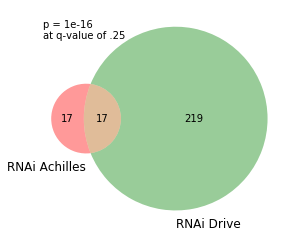

In [8]:
##########################################################################################
######################################### figex 1c #######################################
##########################################################################################
from matplotlib_venn import venn2
from scipy import stats
drive = pd.read_csv('Limma/lim_res_rnai_drive_NEW.csv',index_col=0)
rnai = pd.read_csv('Limma/lim_res_rnai_achilles_NEW.csv',index_col=0)


sh = set(rnai.index&drive.index)


rnai_ = rnai.loc[sh][rnai.loc[sh,'EffectSize'] < -.1]
drive_ = drive.loc[sh][drive.loc[sh,'EffectSize'] < -.1]


thresh = .25
_100 = rnai_[rnai_.loc[:,'q.value'] < thresh].sort_values('EffectSize').iloc[0:100]

dataset_b = drive_[drive_.loc[:,'q.value'] < thresh]

both = set(set(_100.index) & set(dataset_b.index))
v=venn2(subsets = (len(set(_100.index) - both), len(set(dataset_b.index) - both), len(set(set(_100.index) & set(dataset_b.index)))), set_labels = ('RNAi Achilles','RNAi Drive'))



a_sig = set(_100.index)
b_sig = set(dataset_b.index)
a_not_sig = set(sh) - a_sig
b_not_sig = set(sh) - b_sig

oddsratio, pvalue = stats.fisher_exact([[len(a_sig & b_sig), len(a_sig & b_not_sig)],
                                        [len(a_not_sig & b_sig), len(a_not_sig & b_not_sig)]])

print(pvalue)

plt.legend(title='p = '+ str(round(pvalue,16)) + '\nat q-value of .25',frameon=False,loc='upper left')

#plt.savefig('fig1d/achilles_drive_100_.25_-.1.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 5.635164650878929e-07
RNAi Achilles p-value for MAD2L1: 0.00012537549828545578


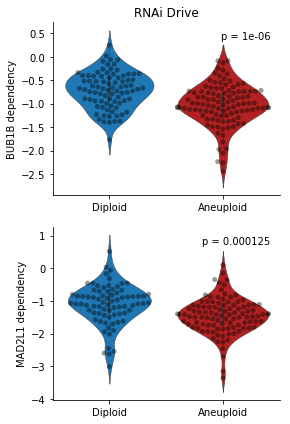

In [13]:
##########################################################################################
######################################### figex 1d #######################################
##########################################################################################


fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
temp = gene_effect_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,6)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive.loc[trus,'MAD2L1 (4085)'].dropna(),gene_effect_rnai_drive.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)
# plt.savefig('fig2a/rnai_drive_lineage_regressed_out.pdf')



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.26378027093402934        p = 0.0003888401638310891
MAD2L1 dependency and expression : r = 0.40381940443136033        p = 2.495226526206009e-08


No handles with labels found to put in legend.
No handles with labels found to put in legend.


BUB1B dependency and expression : r = 0.3613985870208916        p = 2.7696239226739648e-08
MAD2L1 dependency and expression : r = 0.31164662893518275        p = 2.07006029653576e-06


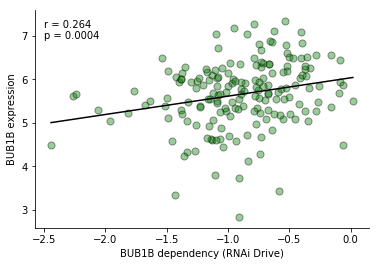

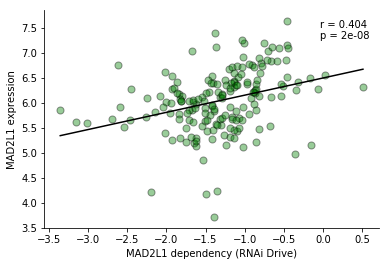

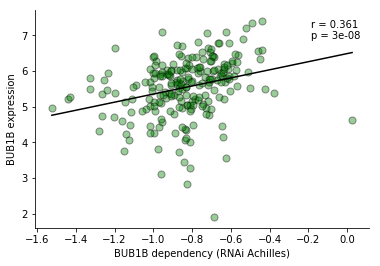

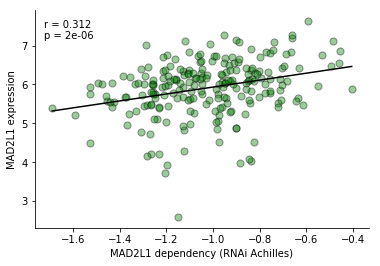

In [16]:
##########################################################################################
######################################### figex 1f #######################################
##########################################################################################

# note that this is using spearman instead of pearson!

public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')
public_19Q4_proteincoding_tpm_ = public_19Q4_proteincoding_tpm.copy()
public_19Q4_proteincoding_tpm_.index = anot.loc[public_19Q4_proteincoding_tpm_.index,'CCLE_ID']

shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_drive.index) 
without_na = gene_effect_rnai_drive.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Drive)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,4)),frameon=False)




plt.savefig('fig2c/bub1b_exp_dep_rnai_drive_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Drive)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_drive.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)



plt.savefig('fig2c/mad2l1_exp_dep_rnai_drive_SPEARMAN.pdf')




#fix,axx = plt.subplots(2,1,figsize=(5,4.5))


shared = set(public_19Q4_proteincoding_tpm_.index) & set(gene_effect_rnai_achilles.index) 
without_na = gene_effect_rnai_achilles.loc[shared,'MAD2L1 (4085)'].dropna().index & shared

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'], public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'])),color='black')
plt.xlabel('BUB1B dependency (RNAi Achilles)')
plt.ylabel('BUB1B expression')
plotting.simpleaxis(ax)
#plt.figure()
import scipy
r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'BUB1B (701)'],public_19Q4_proteincoding_tpm_.loc[without_na,'BUB1B (701)'])
print('BUB1B dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,8)),frameon=False)




# plt.savefig('fig2c/bub1b_exp_dep_rnai_achilles_SPEARMAN.pdf')

fig,ax = plt.subplots()
plt.scatter(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'],alpha=.4,edgecolors='black',s=50,color='green',label=None)
plt.plot(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)']), np.poly1d(np.polyfit(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'], public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'], 1))(np.unique(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'])),color='black')
plt.xlabel('MAD2L1 dependency (RNAi Achilles)')
plt.ylabel('MAD2L1 expression')
plotting.simpleaxis(ax)





r,p = scipy.stats.spearmanr(gene_effect_rnai_achilles.loc[without_na,'MAD2L1 (4085)'],public_19Q4_proteincoding_tpm_.loc[without_na,'MAD2L1 (4085)'])
print('MAD2L1 dependency and expression : r = ' + str(r) + '        ' + 'p = ' + str(p))
ax.legend(title='r = ' + str(round(r,3)) + '\np = '+ str(round(p,6)),frameon=False)



# plt.savefig('fig2c/mad2l1_exp_dep_rnai_achilles_SPEARMAN.pdf')


